In [61]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
%matplotlib inline
from sklearn.model_selection import *
from sklearn.preprocessing import *

In [62]:
data_frame = pd.read_csv('winequality-red.csv', parse_dates=True)

In [63]:
data_frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
data_frame.groupby('quality').count().reset_index()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,10,10,10,10,10,10,10,10,10,10,10
1,4,53,53,53,53,53,53,53,53,53,53,53
2,5,681,681,681,681,681,681,681,681,681,681,681
3,6,638,638,638,638,638,638,638,638,638,638,638
4,7,199,199,199,199,199,199,199,199,199,199,199
5,8,18,18,18,18,18,18,18,18,18,18,18


In [65]:
data_frame['quality'].replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True)

In [66]:
X = data_frame[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y = data_frame['quality']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [68]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [69]:
model = tf.keras.models.Sequential([
  keras.layers.Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=32, activation='relu'),
  keras.layers.Dense(units=6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',  metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1536      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 6)                 198       
                                                                 
Total params: 12,070
Trainable params: 12,070
Non-trainable params: 0
_________________________________________________________________


In [70]:
h = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=64)

Epoch 1/40
20/20 [==============================] - 1s 10ms/step - loss: 1.8342 - accuracy: 0.1572 - val_loss: 1.7578 - val_accuracy: 0.3156
Epoch 2/40
20/20 [==============================] - 0s 3ms/step - loss: 1.7050 - accuracy: 0.3776 - val_loss: 1.6494 - val_accuracy: 0.4062
Epoch 3/40
20/20 [==============================] - 0s 4ms/step - loss: 1.6084 - accuracy: 0.4175 - val_loss: 1.5620 - val_accuracy: 0.4250
Epoch 4/40
20/20 [==============================] - 0s 3ms/step - loss: 1.5269 - accuracy: 0.4371 - val_loss: 1.4851 - val_accuracy: 0.4406
Epoch 5/40
20/20 [==============================] - 0s 3ms/step - loss: 1.4544 - accuracy: 0.4535 - val_loss: 1.4171 - val_accuracy: 0.4594
Epoch 6/40
20/20 [==============================] - 0s 3ms/step - loss: 1.3910 - accuracy: 0.4793 - val_loss: 1.3585 - val_accuracy: 0.4906
Epoch 7/40
20/20 [==============================] - 0s 3ms/step - loss: 1.3369 - accuracy: 0.4957 - val_loss: 1.3104 - val_accuracy: 0.4875
Epoch 8/40
20/20 [=

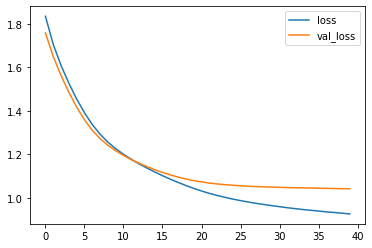

In [71]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [72]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print("Loss")
print(ModelLoss)
print("Accuracy")
print(ModelAccuracy)

10/10 [==============================] - 0s 2ms/step - loss: 1.0418 - accuracy: 0.5781
Loss
1.04180109500885
Accuracy
0.578125
